# Assignment 2<br>

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.  
<br>
## Part 1 - Regression

(11,)


<IPython.core.display.Javascript object>


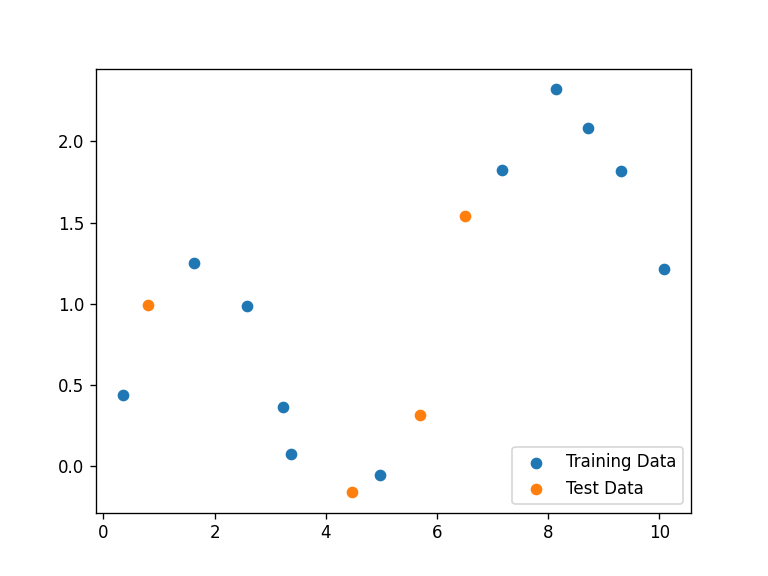

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
#print(X_train.shape)
def intro():
    %matplotlib notebook
    
    plt.figure()
    plt.scatter(X_train, y_train, label='Training Data')
    plt.scatter(X_test, y_test, label='Test Data')
    plt.legend(loc=4);
    
intro()

### Question 1<br>

Write a function that fits a polynomial `LinearRegression` model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use `PolynomialFeatures` in `sklearn.preprocessing` to create the polynomial features and then fit a linear regression model.) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.  
<br>
<img src='polynomialreg1.png' style='width: 1000px;'/>
<br>
The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).  
<br>
*This function should return a numpy array with shape `(4, 100)`*

In [16]:
def answer_one():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    
    degrees = [1, 3, 6, 9]
    degree_predictions = np.zeros((4, 100))
    xfit = np.linspace(0, 10, 100).reshape(-1, 1)
    
    for i, deg in enumerate(degrees):
        poly = PolynomialFeatures(deg)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))  ## Compute number of output features then transform
        
        linreg = LinearRegression().fit(X_train_poly, y_train)
        
        xfit_poly = poly.transform(xfit)
        degree_predictions[i,:] = linreg.predict(xfit_poly)
        
    return degree_predictions

dp = answer_one()
dp.shape

(4, 100)

<IPython.core.display.Javascript object>


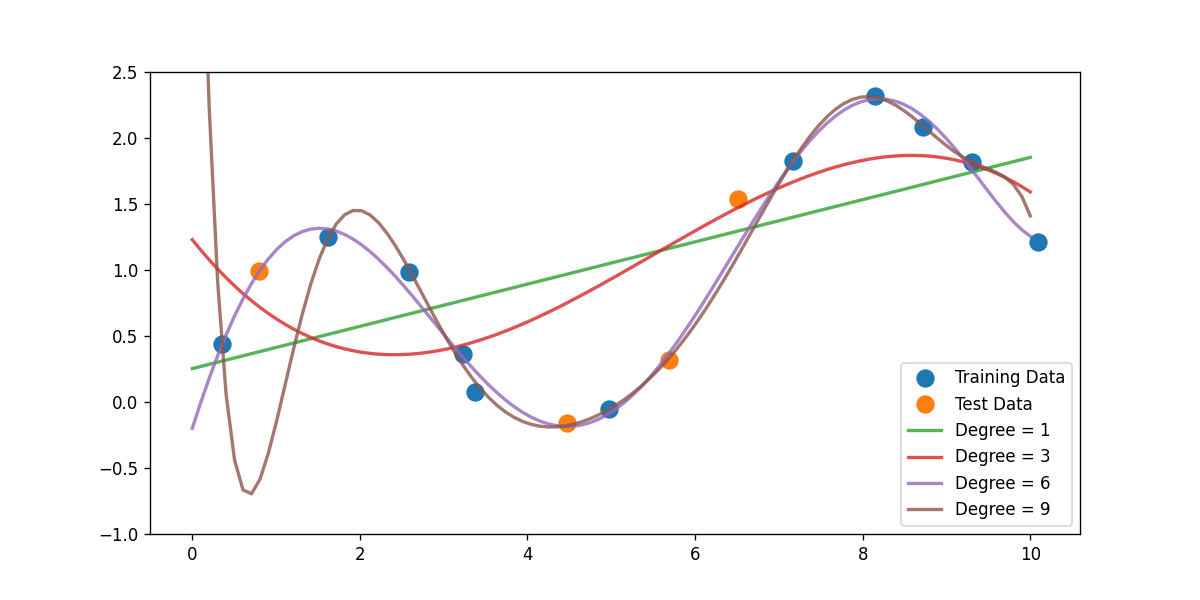

In [17]:
def plot_one(degree_predictions):
    degrees = [1, 3, 6, 9]
    xfit = np.linspace(0, 10, 100).reshape(-1, 1)
    
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='Training Data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='Test Data', markersize=10)
    
    for i, deg in enumerate(degrees):
        plt.plot(xfit, degree_predictions[i,:], alpha=0.8, linewidth=2, label='Degree = {}'.format(deg))
        
    plt.ylim(-1, 2.5)
    plt.legend(loc=4)
    
plot_one(answer_one())

## Question 2<br>

Write a function that fits a polynomial `LinearRegression` model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as on the test data, and return both of these arrays in a tuple.  
<br>
*This function should return a tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [27]:
def answer_two():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    
    r2_train = []
    r2_test  = []

    degrees = np.linspace(0, 9, 10, dtype='int')
    
    for deg in degrees:
        poly = PolynomialFeatures(deg)
        
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly  = poly.transform(X_test.reshape(-1, 1))
        
        linreg = LinearRegression().fit(X_train_poly, y_train)
        
        r2_train.append(r2_score(y_train, linreg.predict(X_train_poly)))  ## Same as doing linreg.score(X, y)
        r2_test.append(r2_score(y_test, linreg.predict(X_test_poly)))

    return (np.array(r2_train), np.array(r2_test))

r2 = answer_two()

print(r2[0].shape)
print(r2[1].shape)
print()
print(r2)

(10,)
(10,)

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
       0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]), array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
        0.87708301,  0.9214094 ,  0.92021504,  0.6324795 , -0.64524777]))


### Question 3<br>

Based on the $R^2$ scores from Question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset?   
<br>
(Hint: Try plotting the $R^2$ scores from Question 2 to visualize the relationship)  
<br>
*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

<IPython.core.display.Javascript object>


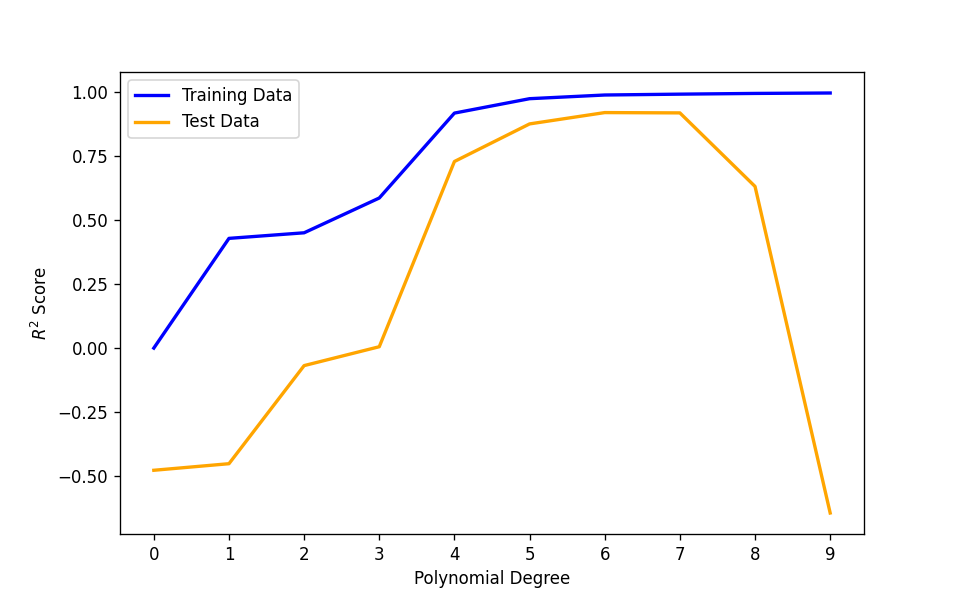

(0, 9, 6)

In [35]:
def answer_three():
    r2_scores = answer_two()
    r2_train  = r2_scores[0]
    r2_test   = r2_scores[1]
    
    degrees = np.linspace(0, 9, 10)
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(degrees, r2_train, color='blue', linestyle='-', linewidth=2, label='Training Data')
    ax.plot(degrees, r2_test, color='orange', linestyle='-', linewidth=2, label='Test Data')
    ax.set(xlabel='Polynomial Degree', ylabel='$R^2$ Score', xticks=degrees)
    ax.legend(loc='upper left')
    plt.show()
    
    most_underfit = r2_train.argmin()
    most_overfit  = r2_train.argmax()
    best_general  = r2_test.argmax()
    
    return (most_underfit, most_overfit, best_general)
    
answer_three()

### Question 4<br>

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized `LinearRegression` model and a `Lasso` Regression model (with parameters `alpha=0.01`, `max_iter=10000`, `tol=0.1`) on polynomial features of degree 12. Return the $R^2$ score for the `LinearRegression` and `Lasso` model's test sets.  
<br>
*This function should return a tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [36]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    
    poly = PolynomialFeatures(12)
    
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly  = poly.transform(X_test.reshape(-1, 1))
    
    linreg = LinearRegression().fit(X_train_poly, y_train)
    lasso  = Lasso(alpha=0.01, max_iter=10000, tol=0.1).fit(X_train_poly, y_train)  ## tol parameter is the tolerance for the optimization
    
    linreg_r2_test = r2_score(y_test, linreg.predict(X_test_poly))
    lasso_r2_test  = r2_score(y_test, lasso.predict(X_test_poly))
    
    return (linreg_r2_test, lasso_r2_test)

answer_four()

(-4.311980555741178, 0.6051396919570099)

## Part 2 - Classification<br>

For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in [mushrooms.csv](mushrooms.csv). The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:  
<br>
*Attribute Information:*  
<br>
1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with `sklearn`. We'll use `pd.get_dummies` to convert the categorical variables into indicator variables.

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('mushrooms.csv')
mush_df_conv = pd.get_dummies(mush_df)

X_mush = mush_df_conv.iloc[:, 2:]
y_mush = mush_df_conv.iloc[:, 1]

X_train_mush, X_test_mush, y_train_mush, y_test_mush = train_test_split(X_mush, y_mush, random_state=0)

mush_df_conv.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


### Question 5<br>

Using `X_train` and `y_train` from the preceeding cell, train a `DecisionTreeClassifier` with default parameters and `random_state=0`. What are the 5 most important features found by the decision tree?  
<br>
*This function should return a list of length 5 of the feature names in descending order of importance.*

In [47]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    
    dt = DecisionTreeClassifier(random_state=0).fit(X_train_mush, y_train_mush)
    
    feat_names  = dt.feature_names_in_
    feat_import = dt.feature_importances_
    
    sorted_feat_import = sorted(zip(feat_names, feat_import), key=lambda x: x[1], reverse=True)
    
    top5_feat = [x[0] for x in sorted_feat_import[:5]]
    
    return top5_feat

answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6<br>

For this question, use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  
<br>
Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).  
<br>
For each level of `gamma`, `validation_curve` will use 3-fold cross validation (use `cv=3, n_jobs=2` as parameters for `validation_curve`), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.  
<br>
Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.  
<br>
e.g.  
<br>
if one of your arrays of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return a tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [49]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    
    gamma_vals = np.logspace(-4, 1, 6)
    
    training_scores, test_scores = validation_curve(SVC(random_state=0), X_mush, y_mush,
                                                    param_name='gamma', param_range=gamma_vals,
                                                    cv=3, n_jobs=2)
    
    mean_train_scores = np.mean(training_scores, axis=1)
    mean_test_scores  = np.mean(test_scores, axis=1)
    
    return (mean_train_scores, mean_test_scores)

answer_six()

(array([0.89838749, 0.98104382, 0.99895372, 1.        , 1.        ,
        1.        ]),
 array([0.88749385, 0.82951748, 0.84170359, 0.86582964, 0.83616445,
        0.51797144]))

### Question 7<br>

Based on the scores from Question 6, what `gamma` value corresponds to a model that is underfitting? What `gamma` value corresponds to a model that is overfitting? What choice of `gamma` would provide a model with good generalization performance on this dataset?  
<br>
(Hint: Try plotting the scores from Question 6 to visualize the relationship)  
<br>
*This function should return a tuple with the `gamma` values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

<IPython.core.display.Javascript object>


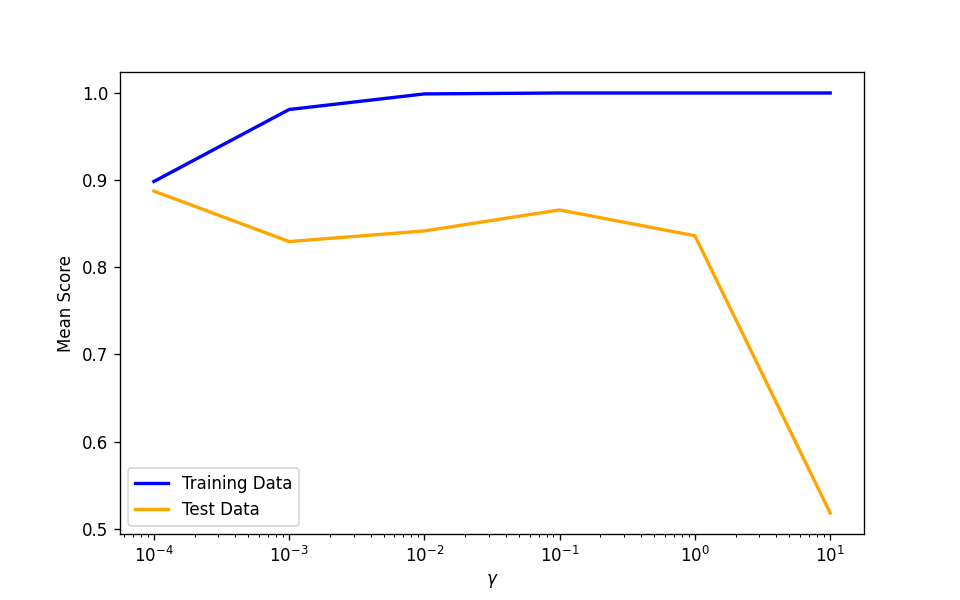

(0.0001, 10.0, 0.1)

In [52]:
def answer_seven():
    mean_scores  = answer_six()
    train_scores = mean_scores[0]
    test_scores  = mean_scores[1]
    
    gamma_vals = np.logspace(-4, 1, 6)
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.semilogx(gamma_vals, train_scores, color='blue', linestyle='-', linewidth=2, label='Training Data')
    ax.semilogx(gamma_vals, test_scores, color='orange', linestyle='-', linewidth=2, label='Test Data')
    ax.set(xlabel='$\gamma$', ylabel='Mean Score')
    ax.legend()
    plt.show()
    
    most_underfit = gamma_vals[train_scores.argmin()]
    most_overfit  = gamma_vals[test_scores.argmin()]
    best_general  = gamma_vals[1:][test_scores[1:].argmax()]
    
    return (most_underfit, most_overfit, best_general)

answer_seven()